# Checkpoint 3

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AVD/bestsellers_with_categories_2022_03_27.csv')

# Sumber Data

Sumber data: [Amazon Top 50 Bestselling Books 2009 - 2022](https://www.kaggle.com/datasets/chriskachmar/amazon-top-50-bestselling-books-2009-2022)

# Perbaikan Data dengan Nilai yang Kosong

Dikarenakan pada checkpoint sebelumnya ada penambahan kolom baru dan setelahnya tidak ada pengecekan terhadap missing values atau nilai yang kosong, maka pada checkpoint yang ketiga ini datanya akan diperbaikin

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Name,0.000000
Author,0.000000
User Rating,0.000000
Reviews,0.000000
Price,0.000000
Genre,0.000000
Price Category,1.857143


In [ ]:
df[df['Price Category'].isnull()]

,Name,Author,User Rating,Reviews,Price,Genre,Price Category
8,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720.0,1,Non Fiction,NaN
94,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122.0,0,Fiction,NaN
103,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505.0,0,Fiction,NaN
205,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812.0,0,Fiction,NaN
247,To Kill a Mockingbird,Harper Lee,4.8,26234.0,0,Fiction,NaN
258,Frozen (Little Golden Book),RH Disney,4.7,3642.0,0,Fiction,NaN
265,JOURNEY TO THE ICE P,RH Disney,4.6,978.0,0,Fiction,NaN
269,Little Blue Truck,Alice Schertle,4.9,1884.0,0,Fiction,NaN
294,To Kill a Mockingbird,Harper Lee,4.8,26234.0,0,Fiction,NaN
347,To Kill a Mockingbird,Harper Lee,4.8,26234.0,0,Fiction,NaN


In [ ]:
mode_price_category = df['Price Category'].mode()[0]
df['Price Category'] = df['Price Category'].fillna(mode_price_category)

In [ ]:
df[df['Price Category'].isnull()]

,Name,Author,User Rating,Reviews,Price,Genre,Price Category


In [ ]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Genre,Price Category
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013.0,17,Non Fiction,Menengah
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798.0,5,Non Fiction,Murah
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769.0,13,Fiction,Menengah
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542.0,14,Non Fiction,Menengah
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541.0,4,Fiction,Murah
5,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837.0,15,Fiction,Menengah
6,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37.0,6,Non Fiction,Murah
7,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181.0,12,Fiction,Menengah
8,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720.0,1,Non Fiction,Murah
9,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956.0,14,Non Fiction,Menengah


Data null sudah berhasil diperbaiki

# Visualisasi Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Tabel Data

In [ ]:
df

,Name,Author,User Rating,Reviews,Price,Genre,Price Category
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013.000,17,Non Fiction,Menengah
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798.000,5,Non Fiction,Murah
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769.000,13,Fiction,Menengah
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542.000,14,Non Fiction,Menengah
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541.000,4,Fiction,Murah
...,...,...,...,...,...,...,...
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920.000,9,Fiction,Murah
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929.000,10,Fiction,Murah
697,Verity,Colleen Hoover,4.6,50914.125,11,Fiction,Menengah
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052.000,13,Non Fiction,Menengah


## Distribusi Harga Buku

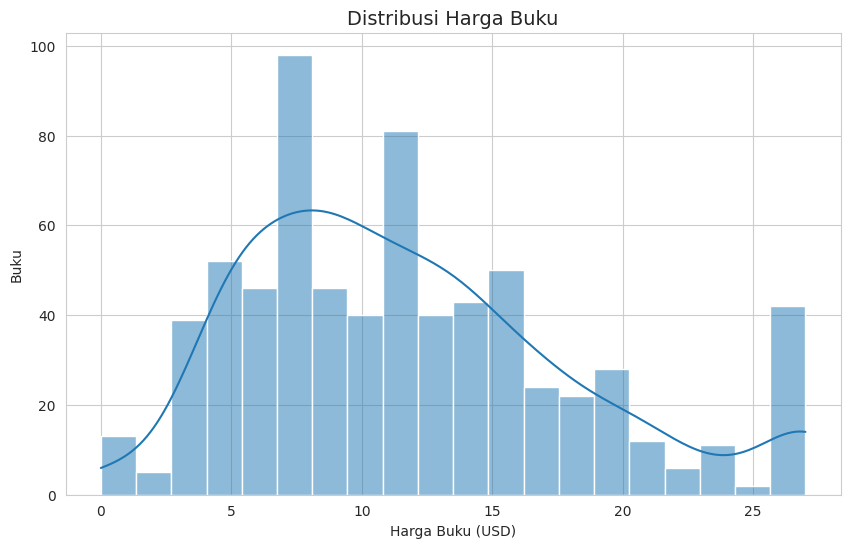

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Distribusi Harga Buku", fontsize=14)
plt.xlabel("Harga Buku (USD)")
plt.ylabel("Buku")
plt.show()

## Jumlah Buku per Genre

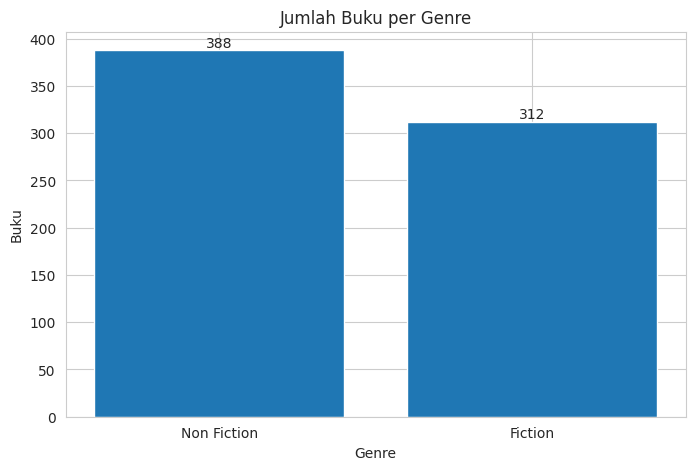

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(df['Genre'].value_counts().index, df['Genre'].value_counts().values)
plt.title('Jumlah Buku per Genre')
plt.xlabel('Genre')
plt.ylabel('Buku')
for i, v in enumerate(df['Genre'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

## Jumlah Buku per Kategori Harga

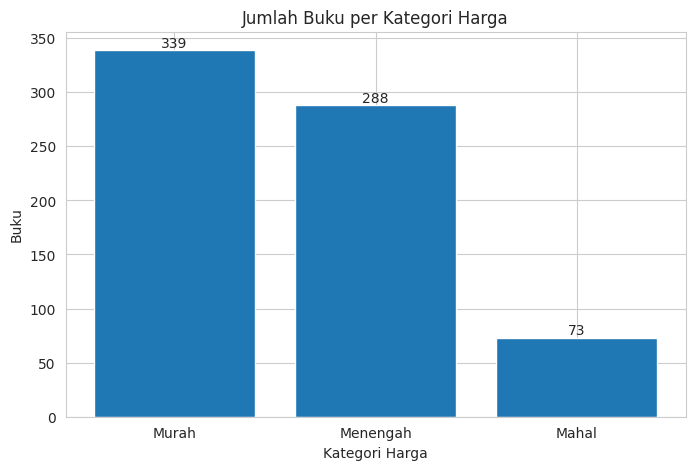

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(df['Price Category'].value_counts().index, df['Price Category'].value_counts().values)
plt.title('Jumlah Buku per Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Buku')
plt.xticks(rotation=0)
for i, v in enumerate(df['Price Category'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

## Dominasi Buku Berdasarkan Rating

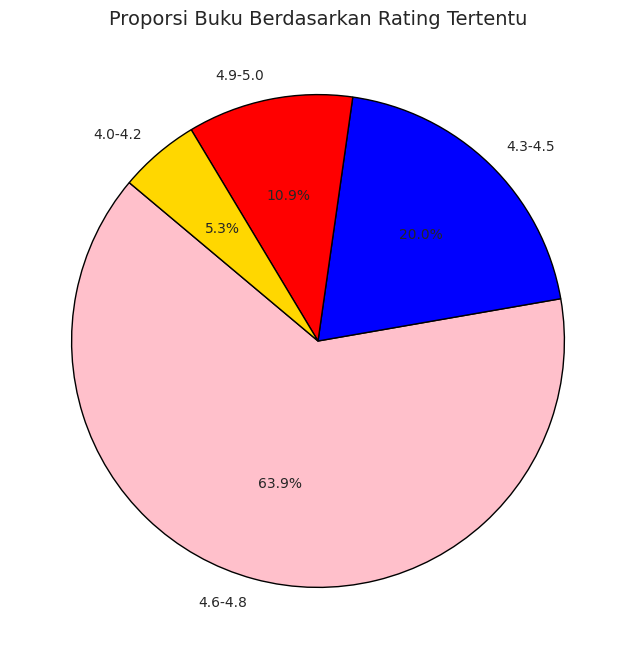

In [ ]:
# Kelompokkan rating ke dalam kategori
bins = [3.9, 4.2, 4.5, 4.8, 5.0]  # Rentang rating
labels = ["4.0-4.2", "4.3-4.5", "4.6-4.8", "4.9-5.0"]

df["Rating Category"] = pd.cut(df["User Rating"], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(8, 8))
df["Rating Category"].value_counts().plot.pie(autopct='%1.1f%%', colors=['pink', 'blue', 'red', 'gold'], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Proporsi Buku Berdasarkan Rating Tertentu", fontsize=14)
plt.ylabel("")
plt.show()

## Jumlah Ulasan dan Harga

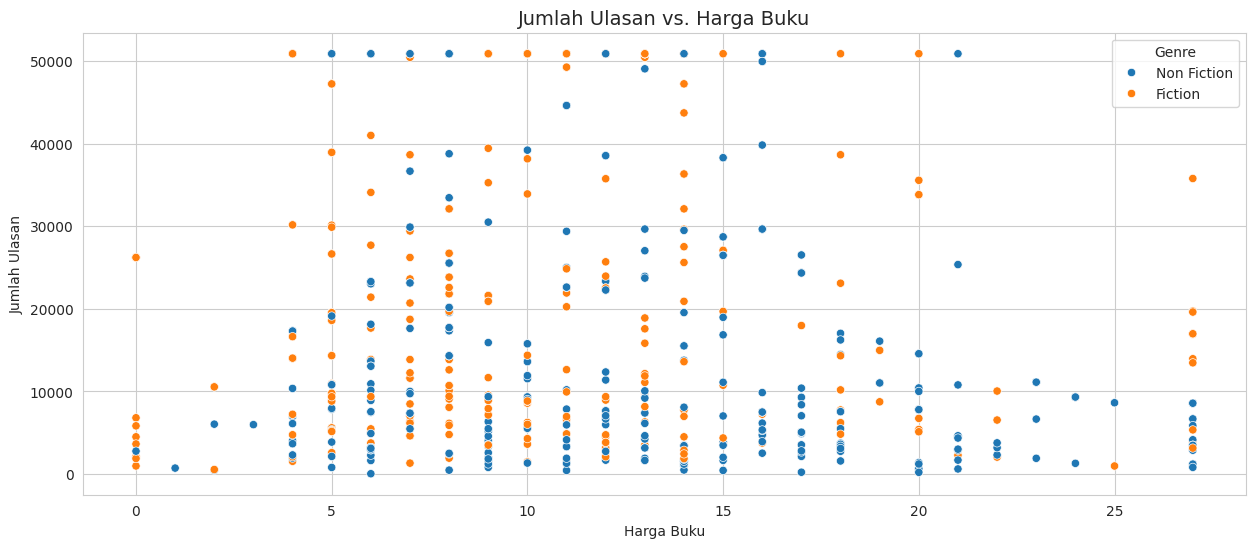

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Price', y='Reviews', hue='Genre', data=df)
plt.title("Jumlah Ulasan vs. Harga Buku", fontsize=14)
plt.xlabel("Harga Buku")
plt.ylabel("Jumlah Ulasan")
plt.legend(title='Genre')
plt.show()

## Boxplot Harga Berdasarkan Kategori

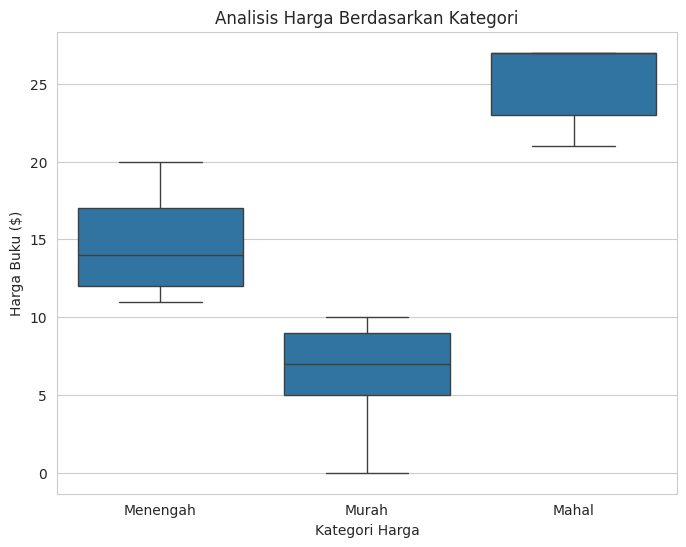

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Price Category"], y=df["Price"])
plt.xlabel("Kategori Harga")
plt.ylabel("Harga Buku ($)")
plt.title("Analisis Harga Berdasarkan Kategori")
plt.show()

# Insight dan Tindakan yang Dapat Diambil

### 1. Distribusi Harga Buku
  * Sebagian besar buku dalam daftar memiliki harga di bawah $20, yang
  menandakan bahwa konsumen lebih memilih buku dengan harga terjangkau juga buku yang murah lebih mudah dijangkau oleh berbagai segmen pembaca, termasuk pelajar dan pembaca kasual
  * Hal ini menunjukkan bahwa harga merupakan faktor utama dalam keputusan pembelian, sehingga strategi seperti diskon, promo bundling, atau edisi khusus dengan harga lebih rendah dapat meningkatkan daya tarik produk
  
### 2. Jumlah Buku Berdasarkan Genre
  * Genre Non-Fiction lebih banyak dibandingkan Fiction, yang bisa menjadi indikasi bahwa pembaca cenderung mencari buku yang memberikan informasi, edukasi, atau pengembangan diri. Namun, genre Fiction tetap memiliki pasar yang kuat, terutama untuk novel populer atau seri terkenal
  * Penerbit dapat menyesuaikan strategi penerbitan dengan memperbanyak buku Non-Fiction yang membahas topik relevan atau tren terbaru

### 3. Jumlah Buku Berdasarkan Kategori Harga
  * Kategori Menengah memiliki jumlah buku terbanyak, menunjukkan bahwa pembeli cenderung memilih harga yang seimbang antara kualitas dan keterjangkauan. Sedangkan kategori Mahal hanya memiliki sedikit buku, mengisyaratkan bahwa segmen ini cukup niche dan hanya golongan tertentu yang membelinya.
  * Fokus promosi pada buku kategori menengah karena mereka mendominasi pasar dan mendorong buku kategori mahal dengan memberikan nilai tambah, seperti edisi khusus, tanda tangan penulis, atau bonus konten eksklusif

### 4. Dominasi Buku Berdasarkan Rating
  * Pada diagram terlihat bahwa kisaran rating 4,6 hingga 4,8 lebih mendominasi yang menandakan bahwa buku yang diterbitkan berkualitas baik dan sangat dinikmati oleh pembaca.
  * Penerbit terus menerbitkan buku buku yang berkualitas dan promosikan buku rating 4.5 ke atas sebagai "Highly Recommended" untuk membangun kepercayaan calon pembeli

### 5. Jumlah Ulasan dan Harga
  * Tidak ada korelasi langsung antara harga dan jumlah ulasan — beberapa buku murah memiliki banyak ulasan, sementara buku mahal cenderung memiliki lebih sedikit dan buku harga menengah dengan ulasan tinggi menonjol, menandakan daya tarik kuat di segmen ini
  * Manfaatkan buku harga menengah dengan banyak ulasan sebagai "bestseller of the week" dalam kampanye pemasaran